In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df = pd.read_csv(r'AuditData.csv')

In [3]:
df.head()

,LOCATION_ID,PARA_A,PARA_B,TOTAL,NUMBER,MONEY_VALUE,SECTOR_SCORE,DISTRICT_SCORE,HISTORY,RISK_FLAG
0,23,4.18,2.50,6.68,5.0,3.38,3.89,2,0,1
1,6,0.00,4.83,4.83,5.0,0.94,3.89,2,0,0
2,6,0.51,0.23,0.74,5.0,0.00,3.89,2,0,0
3,6,0.00,10.80,10.80,6.0,11.75,3.89,2,0,1
4,6,0.00,0.08,0.08,5.0,0.00,3.89,2,0,0


In [4]:
df.shape

(776, 10)

In [5]:
df.describe()

,PARA_A,PARA_B,TOTAL,NUMBER,MONEY_VALUE,SECTOR_SCORE,DISTRICT_SCORE,HISTORY,RISK_FLAG
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,2.450194,10.799988,13.218481,5.067655,14.119412,20.184536,2.505155,0.104381,0.393041
std,5.678870,50.083624,51.312829,0.264449,66.565468,24.319017,1.228678,0.531031,0.488741
min,0.000000,0.000000,0.000000,5.000000,0.000000,1.850000,2.000000,0.000000,0.000000
25%,0.210000,0.000000,0.537500,5.000000,0.000000,2.370000,2.000000,0.000000,0.000000
50%,0.875000,0.405000,1.370000,5.000000,0.090000,3.890000,2.000000,0.000000,0.000000
75%,2.480000,4.160000,7.707500,5.000000,5.587500,55.570000,2.000000,0.000000,1.000000
max,85.000000,1264.630000,1268.910000,9.000000,935.030000,59.850000,6.000000,9.000000,1.000000


### No Notable Findings

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOCATION_ID     776 non-null    object 
 1   PARA_A          776 non-null    float64
 2   PARA_B          776 non-null    float64
 3   TOTAL           776 non-null    float64
 4   NUMBER          776 non-null    float64
 5   MONEY_VALUE     776 non-null    float64
 6   SECTOR_SCORE    776 non-null    float64
 7   DISTRICT_SCORE  776 non-null    int64  
 8   HISTORY         776 non-null    int64  
 9   RISK_FLAG       776 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 60.8+ KB


### Notes
 - No nulls in any columns
 - Data Types are consistent and correct
 
 -----
 

# Model Building Foundation   

###  Target Variable Provided: **RISK_FLAG**
####  - Utilize Supervised, Classification Model
####  - Find Independent Variables

<AxesSubplot:>

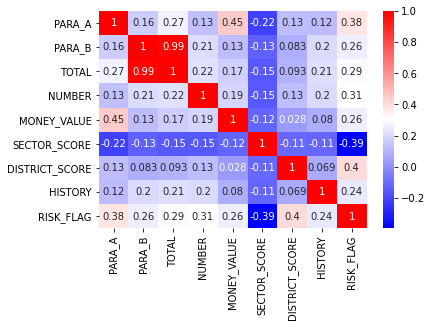

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='bwr')

### All numerical variables have a potentially significant correlation with RISK_FLAG

## Find variables with high multicollinearity using VIF

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
X=df.drop(['LOCATION_ID', 'RISK_FLAG'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         features   vif_Factor
0          PARA_A    72.858690
1          PARA_B  4918.512344
2           TOTAL  5251.253361
3          NUMBER     6.588942
4     MONEY_VALUE     1.366653
5    SECTOR_SCORE     1.789091
6  DISTRICT_SCORE     5.424703
7         HISTORY     1.106462


### Remove TOTAL, made up of PARA_A AND PARA_B summation

In [10]:
X=df.drop(['LOCATION_ID', 'RISK_FLAG', 'TOTAL'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         features  vif_Factor
0          PARA_A    1.576117
1          PARA_B    1.130444
2          NUMBER    6.529303
3     MONEY_VALUE    1.319161
4    SECTOR_SCORE    1.788305
5  DISTRICT_SCORE    5.363164
6         HISTORY    1.102446


### Target VIF <10 achieved
### Initial set of independent variables found
----

# KNN Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [12]:
df.head()

,LOCATION_ID,PARA_A,PARA_B,TOTAL,NUMBER,MONEY_VALUE,SECTOR_SCORE,DISTRICT_SCORE,HISTORY,RISK_FLAG
0,23,4.18,2.50,6.68,5.0,3.38,3.89,2,0,1
1,6,0.00,4.83,4.83,5.0,0.94,3.89,2,0,0
2,6,0.51,0.23,0.74,5.0,0.00,3.89,2,0,0
3,6,0.00,10.80,10.80,6.0,11.75,3.89,2,0,1
4,6,0.00,0.08,0.08,5.0,0.00,3.89,2,0,0


In [13]:
# Split independent and target varaibles
X = df.drop(['RISK_FLAG', 'LOCATION_ID'], axis=1)
y = df['RISK_FLAG']

In [14]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Accuracy Score')

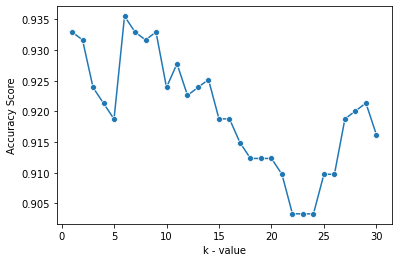

In [16]:
# Find optimal k value using cross validation
k_values = [i for i in range (1,31)]
scores = []

X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("k - value")
plt.ylabel("Accuracy Score")

In [17]:
# Train model using optimal k value 
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [18]:
# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))

Accuracy: 0.97
Precision: 1.0
Recall: 0.93
